In [1]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, predictions)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Demand")
plt.show()


NameError: name 'y_test' is not defined

<Figure size 640x480 with 0 Axes>

In [2]:
df = pd.read_csv("../data/pharmacy_sales_cleaned.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


NameError: name 'pd' is not defined

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [4]:
df = pd.read_csv("../data/pharmacy_sales_cleaned.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.head()


,Date,Medicine_Name,Category,Units_Sold,Unit_Price,Revenue,Stock_Available,Supplier,Expiry_Date,City,Year,Month,Expiry_Days
0,2023-01-01,Atorvastatin,Syrup,184,33,6072,370,Abbott,20-07-2023,Pune,2023,1,200
1,2023-01-02,Amoxicillin,Tablet,79,15,1185,187,Abbott,08-11-2023,Hyderabad,2023,1,310
2,2023-01-03,Azithromycin,Capsule,92,48,4416,513,Sun Pharma,09-01-2024,Bangalore,2023,1,371
3,2023-01-04,Pantoprazole,Capsule,165,16,2640,413,Cipla,19-10-2024,Delhi,2023,1,654
4,2023-01-05,Atorvastatin,Syrup,174,32,5568,799,Sun Pharma,03-03-2024,Mumbai,2023,1,423


In [5]:
daily_demand = df.groupby("Date")["Units_Sold"].sum().reset_index()


In [6]:
daily_demand["Day"] = daily_demand["Date"].dt.day
daily_demand["Month"] = daily_demand["Date"].dt.month
daily_demand["Year"] = daily_demand["Date"].dt.year


In [7]:
X = daily_demand[["Day", "Month", "Year"]]
y = daily_demand["Units_Sold"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
predictions = model.predict(X_test)


NameError: name 'model' is not defined

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [11]:
df = pd.read_csv("../data/pharmacy_sales_cleaned.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.head()


,Date,Medicine_Name,Category,Units_Sold,Unit_Price,Revenue,Stock_Available,Supplier,Expiry_Date,City,Year,Month,Expiry_Days
0,2023-01-01,Atorvastatin,Syrup,184,33,6072,370,Abbott,20-07-2023,Pune,2023,1,200
1,2023-01-02,Amoxicillin,Tablet,79,15,1185,187,Abbott,08-11-2023,Hyderabad,2023,1,310
2,2023-01-03,Azithromycin,Capsule,92,48,4416,513,Sun Pharma,09-01-2024,Bangalore,2023,1,371
3,2023-01-04,Pantoprazole,Capsule,165,16,2640,413,Cipla,19-10-2024,Delhi,2023,1,654
4,2023-01-05,Atorvastatin,Syrup,174,32,5568,799,Sun Pharma,03-03-2024,Mumbai,2023,1,423


In [12]:
daily_demand = df.groupby("Date")["Units_Sold"].sum().reset_index()
daily_demand["Day"] = daily_demand["Date"].dt.day
daily_demand["Month"] = daily_demand["Date"].dt.month
daily_demand["Year"] = daily_demand["Date"].dt.year
daily_demand.head()


,Date,Units_Sold,Day,Month,Year
0,2023-01-01,184,1,1,2023
1,2023-01-02,79,2,1,2023
2,2023-01-03,92,3,1,2023
3,2023-01-04,165,4,1,2023
4,2023-01-05,174,5,1,2023


In [13]:
X = daily_demand[["Day", "Month", "Year"]]
y = daily_demand["Units_Sold"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
predictions = model.predict(X_test)


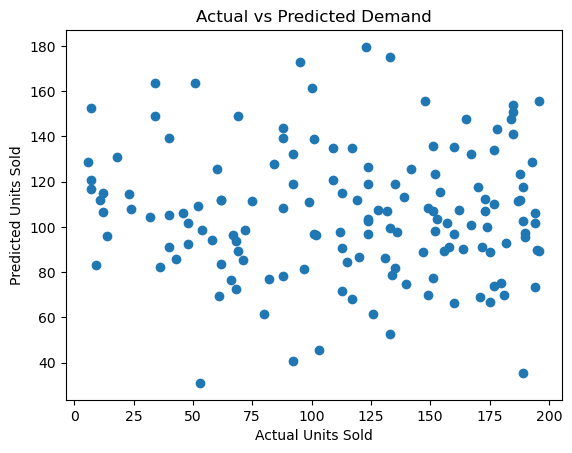

In [16]:
plt.figure()
plt.scatter(y_test, predictions)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Demand")
plt.show()


In [17]:
future_dates = pd.date_range(
    start=daily_demand["Date"].max() + pd.Timedelta(days=1),
    periods=30,
    freq="D"
)

future_df = pd.DataFrame({
    "Day": future_dates.day,
    "Month": future_dates.month,
    "Year": future_dates.year
})

future_predictions = model.predict(future_df)

future_forecast = pd.DataFrame({
    "Date": future_dates,
    "Predicted_Units_Sold": future_predictions.astype(int)
})

future_forecast.head()


,Date,Predicted_Units_Sold
0,2025-01-01,80
1,2025-01-02,79
2,2025-01-03,148
3,2025-01-04,155
4,2025-01-05,175


In [18]:
future_forecast.to_csv("../data/30_day_demand_forecast.csv", index=False)
